78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
### Model Evaluation on Training Data ###
Mean Squared Error (MSE): 85.0798
Mean Absolute Error (MAE): 3.7509
R-squared (R2): 0.9799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


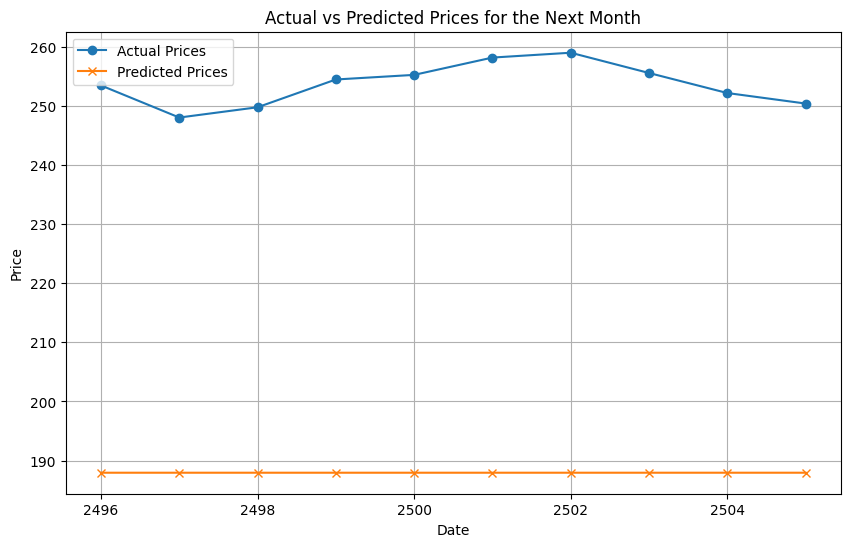

### Next Month's Predictions ###
   Date  Actual Price  Predicted Price
0  2496    253.479996       187.942688
1  2497    248.050003       187.942703
2  2498    249.789993       187.942688
3  2499    254.490005       187.942688
4  2500    255.270004       187.942688
5  2501    258.200012       187.942703
6  2502    259.019989       187.942734
7  2503    255.589996       187.942749
8  2504    252.199997       187.942734
9  2505    250.419998       187.942719
Predictions saved as 'next_month_predictions.csv'


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import load_model

# Load the model
model_path = "stock_price_predictor.h5"
model = load_model(model_path)

# Directory where preprocessed stock data CSV files are stored
processed_data_dir = "processed_stock_data"

# Function to load and prepare evaluation data for a single stock
def load_evaluation_data(file_path):
    data = pd.read_csv(file_path)
    
    # Select features and target
    features = data[["Open", "High", "Low", "Close", "Volume", "5-Day Moving Avg", "10-Day Volatility"]]
    target = data["Close"].shift(-1)  # Predict the next day's closing price
    
    # Drop the last row where the target is NaN
    features = features[:-1]
    target = target[:-1]
    
    # Extract the last month of data for predictions
    evaluation_features = features[-10:]  # Assuming the last 30 rows are the next month's data
    evaluation_target = target[-10:]
    
    # Exclude the last month from the main dataset for proper evaluation
    features = features[:-10]
    target = target[:-10]
    
    return features, target, evaluation_features, evaluation_target

# Prepare data for one stock (e.g., AAPL)
stock_file_path = os.path.join(processed_data_dir, "AAPL_processed.csv")
features, target, eval_features, eval_target = load_evaluation_data(stock_file_path)

# Reshape for LSTM input
X_train = np.reshape(features.values, (features.shape[0], features.shape[1], 1))
X_eval = np.reshape(eval_features.values, (eval_features.shape[0], eval_features.shape[1], 1))

# Evaluate on the training set
predicted_train = model.predict(X_train)
mse = mean_squared_error(target, predicted_train)
mae = mean_absolute_error(target, predicted_train)
r2 = r2_score(target, predicted_train)

print("### Model Evaluation on Training Data ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Predict the next month's data
predicted_eval = model.predict(X_eval)

# Plot actual vs predicted for the next month's data
plt.figure(figsize=(10, 6))
plt.plot(eval_target.index, eval_target, label="Actual Prices", marker='o')
plt.plot(eval_target.index, predicted_eval, label="Predicted Prices", marker='x')
plt.title("Actual vs Predicted Prices for the Next Month")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Display raw predictions for the next month's data
results = pd.DataFrame({
    "Date": eval_features.index,
    "Actual Price": eval_target.values,
    "Predicted Price": predicted_eval.flatten()
})
print("### Next Month's Predictions ###")
print(results)

# Save results to CSV for reference
results.to_csv("next_month_predictions.csv", index=False)
print("Predictions saved as 'next_month_predictions.csv'")
